# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [25]:
import pandas as pd
import torch as th
import numpy as np
th.device("cuda" if th.cuda.is_available() else "cpu")

device(type='cuda')

1\. Создайте тензор и исследуйте его основные характеристики

In [26]:
t = th.rand(2,3,4)
t.shape, t.dtype 

(torch.Size([2, 3, 4]), torch.float32)

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [27]:
mask = [1,0,1]

t[:,mask]

tensor([[[0.3171, 0.4355, 0.5272, 0.6614],
         [0.4214, 0.3090, 0.3694, 0.4597],
         [0.3171, 0.4355, 0.5272, 0.6614]],

        [[0.9867, 0.0526, 0.0350, 0.1897],
         [0.3650, 0.2838, 0.3068, 0.9070],
         [0.9867, 0.0526, 0.0350, 0.1897]]])

In [28]:
t[0].shape

torch.Size([3, 4])

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [29]:
t = th.rand(4,4)
display(t)

t[:,1::2] +=1
t[:,::2] -=1

t

tensor([[0.1770, 0.8819, 0.2430, 0.3307],
        [0.9595, 0.7846, 0.7484, 0.1843],
        [0.8074, 0.4178, 0.1692, 0.3961],
        [0.0998, 0.8665, 0.4684, 0.6335]])

tensor([[-0.8230,  1.8819, -0.7570,  1.3307],
        [-0.0405,  1.7846, -0.2516,  1.1843],
        [-0.1926,  1.4178, -0.8308,  1.3961],
        [-0.9002,  1.8665, -0.5316,  1.6335]])

4\. Обсудите совместимость `torch` с `numpy` и `sklearn`

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

- [x] Проверено на семинаре

In [30]:
t = th.zeros([100000, 10], dtype=th.float32)
t[th.arange(100000),th.randint(0, 10, (100000,))] = 1
t.mean(0)

tensor([0.1008, 0.1000, 0.1010, 0.0996, 0.1028, 0.0980, 0.1009, 0.0989, 0.0977,
        0.1002])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над  побочной диагональю.

- [ ] Проверено на семинаре

In [31]:
t = th.randint(0,11,(10,10))
mask = np.bool([i[::-1] for i in np.vectorize(np.logical_xor)(np.triu(np.ones(t.shape),2),np.triu(np.ones(t.shape),1))])

display(t)
t[mask]

tensor([[ 6,  0,  8,  4,  0,  9,  4,  1,  8,  7],
        [ 3,  3,  4,  5,  7, 10,  3,  1,  4,  3],
        [ 6,  3,  0,  4,  1,  0,  8,  4,  6,  9],
        [ 6,  4,  6,  1, 10,  3,  3,  6,  4,  5],
        [ 2,  3,  3,  9,  4,  8,  5,  9,  5, 10],
        [ 7,  2,  5,  2,  0, 10,  1,  7,  7,  3],
        [ 1,  6,  9,  6, 10,  6,  7,  3,  6,  8],
        [ 3,  6,  5,  6,  9,  3, 10,  0,  2,  3],
        [ 4,  7, 10,  5,  9,  0,  8, 10,  1,  1],
        [ 3,  8, 10,  0, 10,  0,  0,  6,  6,  3]])

tensor([8, 1, 8, 3, 4, 2, 9, 6, 4])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулите все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

- [x] Проверено на семинаре

In [32]:
t = th.randint(0,101,(5,5))
row_max, col_max = th.unravel_index(th.argmax(t), t.shape)

row_start = max(0, row_max - 1)
row_end = min(5, row_max + 2)
col_start = max(0,col_max - 1)
col_end = min(5, col_max + 2)

mask = th.zeros_like(t, dtype=th.bool)
mask[row_start:row_end, col_start:col_end] = True

result = t.clone()
result[~mask] = 0

t, result

(tensor([[ 63,  34,  28,  16,  72],
         [ 41,  69,  59, 100,  55],
         [ 60,  50,  56,  82,  67],
         [ 24,  22,  66,  62,  62],
         [  0,  89,  17,  43,  28]]),
 tensor([[  0,   0,  28,  16,  72],
         [  0,   0,  59, 100,  55],
         [  0,   0,  56,  82,  67],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0]]))

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

- [x] Проверено на семинаре

In [33]:
t_u = th.stack([t, result], dim=0)
display(t_u)
th.save(t_u, 'tensor.pt')

load_t=th.load('tensor.pt')
display(load_t)
th.all(t_u == load_t)

tensor([[[ 63,  34,  28,  16,  72],
         [ 41,  69,  59, 100,  55],
         [ 60,  50,  56,  82,  67],
         [ 24,  22,  66,  62,  62],
         [  0,  89,  17,  43,  28]],

        [[  0,   0,  28,  16,  72],
         [  0,   0,  59, 100,  55],
         [  0,   0,  56,  82,  67],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0]]])

tensor([[[ 63,  34,  28,  16,  72],
         [ 41,  69,  59, 100,  55],
         [ 60,  50,  56,  82,  67],
         [ 24,  22,  66,  62,  62],
         [  0,  89,  17,  43,  28]],

        [[  0,   0,  28,  16,  72],
         [  0,   0,  59, 100,  55],
         [  0,   0,  56,  82,  67],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0]]])

tensor(True)

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

- [x] Проверено на семинаре

In [34]:
t5 = th.randint(1,11,(2, 3, 5, 5), dtype=th.float32)
t5.mean(dim=(3,2), keepdim=False).reshape(2,3,1)

tensor([[[4.7600],
         [5.4400],
         [5.8000]],

        [[4.9600],
         [6.2000],
         [5.4000]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

- [x] Проверено на семинаре

end_cpu=1.4334003925323486 sec


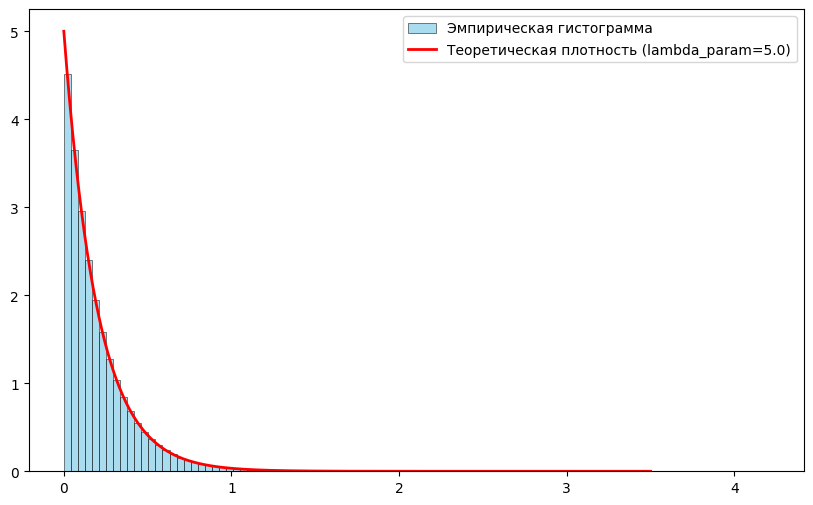

Cuda available!
end_gpu=0.001699209213256836 sec


In [35]:
import matplotlib.pyplot as plt
import time
N=100_000_000
lambda_param = 5.0

start_cpu = time.time()
exponential_dist = th.distributions.Exponential(th.tensor(lambda_param))
sample_tensor = exponential_dist.sample([N])
end_cpu = time.time() - start_cpu

print(f'{end_cpu=} sec')

plt.figure(figsize=(10, 6))
plt.hist(sample_tensor.numpy(), bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5, label='Эмпирическая гистограмма')
x = np.linspace(0, 3.5, 1000)
y = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, y, 'r-', linewidth=2, label=f'Теоретическая плотность ({lambda_param=})')
plt.legend()
plt.show()



if th.cuda.is_available():
    print('Cuda available!')
    start_gpu = time.time()
    exponential_dist = th.distributions.Exponential(th.tensor(lambda_param, device='cuda'))
    sample_tensor = exponential_dist.sample([N])
    end_gpu = time.time() - start_gpu

    print(f'{end_gpu=} sec')

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите третий и четвертый столбцы; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

- [ ] Проверено на семинаре

In [36]:
t = th.randint(0,256,(10, 6, 6, 3))
t[:, :, :, 0][:,:,:2] =0
t[:, :, :, 1][:,:,[2,3]] =0
t[:, :, :, 2][:,:,[4,5]] =0

t

tensor([[[[  0, 185, 106],
          [  0, 120, 199],
          [ 90,   0, 225],
          [198,   0,  81],
          [ 80, 172,   0],
          [146, 104,   0]],

         [[  0, 231, 104],
          [  0,  21, 128],
          [170,   0,  80],
          [199,   0,  20],
          [ 11, 178,   0],
          [ 94, 167,   0]],

         [[  0, 110,  41],
          [  0, 167, 150],
          [100,   0,  33],
          [159,   0, 205],
          [185,  41,   0],
          [138, 158,   0]],

         [[  0, 137, 234],
          [  0, 143,  61],
          [ 47,   0,  43],
          [180,   0,   1],
          [194, 102,   0],
          [230, 172,   0]],

         [[  0,  36,  20],
          [  0, 229,  61],
          [130,   0, 114],
          [205,   0, 228],
          [ 22,  60,   0],
          [ 17,  56,   0]],

         [[  0,  79,  61],
          [  0, 126, 248],
          [216,   0, 146],
          [113,   0, 174],
          [  7,  16,   0],
          [102,  34,   0]]],


        [[[  0